In [2]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scanpy as sc
from bbknn import bbknn
import scanorama as scanorama
import pandas as pd

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=100)

scanpy==1.6.0 anndata==0.7.4 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


In [3]:
P28_gaba = sc.read_h5ad('P28_dr_gaba.h5ad')

In [4]:
P28_gaba

AnnData object with n_obs × n_vars = 2589 × 20350
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'sample'
    var: 'gene_ids', 'feature_types', 'n_cells-P28_dr_1a', 'n_cells-P28_dr_1b', 'n_cells-P28_dr_3a', 'n_cells-P28_dr_3b', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'leiden_colors', 'sample_colors'
    obsm: 'X_pca', 'X_umap'

# P28 gaba

In [6]:
#del scanorama
del P28_gaba.obsp
del P28_gaba.varm
del P28_gaba.obsm
del P28_gaba.uns
for i in ['n_cells-P28_dr_1a', 'n_cells-P28_dr_1b', 'n_cells-P28_dr_3a', 'n_cells-P28_dr_3b', 'highly_variable', 
          'means', 'dispersions', 'dispersions_norm', 'mean', 'std']: del P28_gaba.var[i]
P28_gaba.X = P28_gaba.raw.X
sc.pp.highly_variable_genes(P28_gaba, min_mean=0.0125, max_mean=3, min_disp=0.5) #HVGs


sc.pp.scale(P28_gaba, max_value=10) #scale
sc.tl.pca(P28_gaba, svd_solver='arpack') #run PCA

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Number of neighbors doesn't seem to affect expression of markers in clusters

In [15]:
#sc.pp.neighbors(P28_gaba, n_neighbors=25, n_pcs=40)
bbknn(P28_gaba, batch_key='sample',neighbors_within_batch =6 ) #6*4 ~ 25, which is consistent for other ages
sc.tl.leiden(P28_gaba)
sc.tl.umap(P28_gaba)

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/bbknn/__init__.py:294: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = bbknn_out[0]
/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/bbknn/__init__.py:295: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = bbknn_out[1]


In [17]:
#lots of Slc17a7 expression
P28_gaba = P28_gaba[P28_gaba.obs['leiden']!='4',:]
P28_gaba = P28_gaba[P28_gaba.obs['leiden']!='16',:]
P28_gaba = P28_gaba[P28_gaba.obs['leiden']!='8',:]
P28_gaba = P28_gaba[P28_gaba.obs['leiden']!='17',:]

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


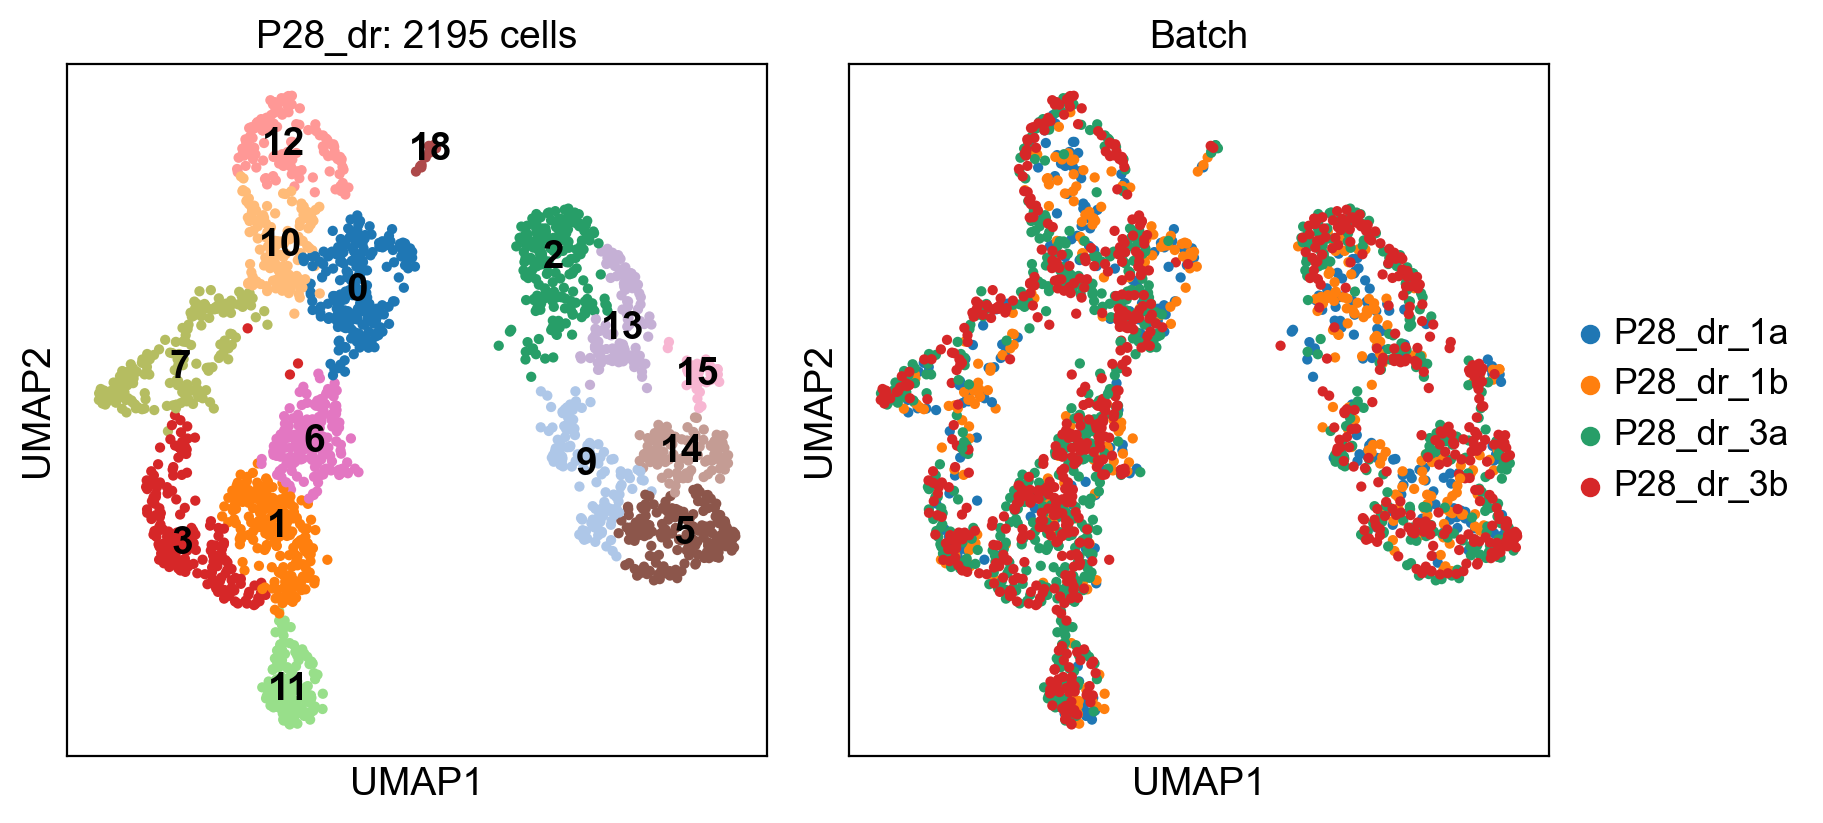

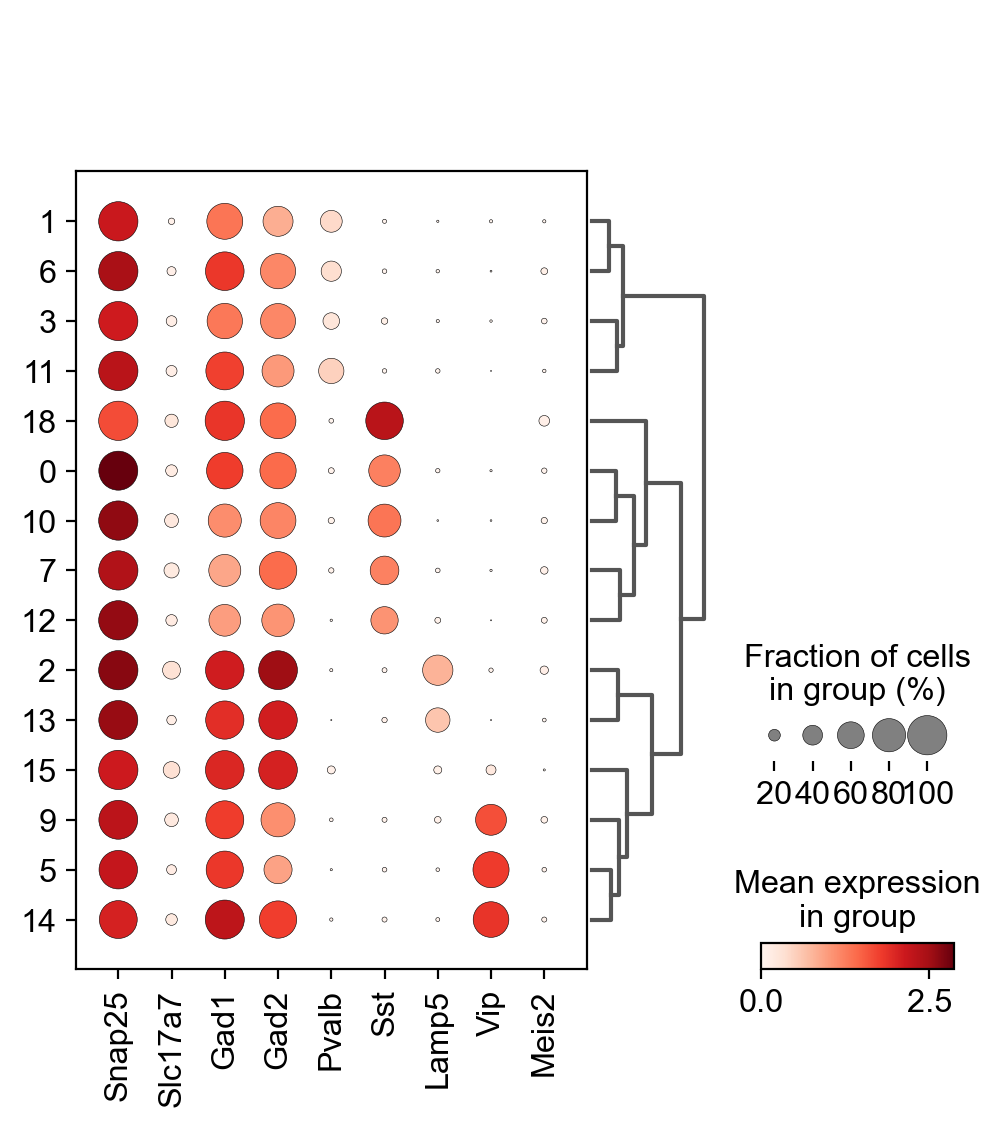

In [22]:
sc.tl.dendrogram(P28_gaba, groupby='leiden')
fig, axs = plt.subplots(1, 2, figsize = (9,4), constrained_layout=True)

'''
sc.pl.umap(P28_gaba, color='cluster', ax=axs[0], 
           show=False, legend_fontsize='10', legend_loc='on data',
           title='P28: ' + str(P28_gaba.shape[0]) + ' cells', 
          palette=('#17becf', '#8c564b', '#ffbb78', '#e377c2', '#ff7f0e', '#d62728', 
                  '#aec7e8', '#ff9896', '#98df8a', '#dbdb8d', '#f7b6d2', '#1f77b4', '#b5bd61', 
                  '#aa40fc', '#c5b0d5', '#c49c94'), frameon=True)
'''
sc.pl.umap(P28_gaba, color='leiden', ax=axs[0], show=False, 
           title='P28_dr: ' + str(P28_gaba.shape[0]) + ' cells', legend_loc='on data')
sc.pl.umap(P28_gaba, color='sample', ax=axs[1], show=False, title='Batch')

bias_markers = ['Snap25', 'Slc17a7', 'Gad1', 'Gad2', 'Pvalb', 'Sst', 'Lamp5', 'Vip']

#bias_pos = [(0,6), (7,15)]
#bias_labels = ['Neuronal', 'Non-Neuronal']
sc.pl.dotplot(P28_gaba, bias_markers, groupby='leiden', dendrogram=True)

In [27]:
P28_gaba.write_h5ad('P28_gaba_dr_Clustered.h5ad')

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
